In [0]:
from scipy.interpolate import griddata
import numpy as np
import operator
from google.colab import files
from scipy import spatial
import pandas as pd
import json
import csv

In [0]:
!ls -al

total 40
drwxr-xr-x 1 root root  4096 Mar  2 17:45 .
drwxr-xr-x 1 root root  4096 Mar  2 15:52 ..
-rw-r--r-- 1 root root   763 Mar  2 17:45 catgories2.csv
-rw-r--r-- 1 root root   477 Mar  2 17:45 catgories.csv
drwxr-xr-x 1 root root  4096 Feb 26 17:33 .config
-rw-r--r-- 1 root root 15961 Mar  2 17:36 pre-processed-mastertable2.csv
-rw-r--r-- 1 root root     0 Mar  2 18:13 pre-processed-mastertable.csv
drwxr-xr-x 1 root root  4096 Feb 26 17:33 sample_data


In [0]:
uploaded = files.upload()

Saving generatedMockData.csv to generatedMockData.csv


In [0]:
data = pd.read_csv('MainDataset2.csv')
data2 = pd.read_csv('generatedMockData.csv')
masterTable = pd.read_csv('pre-processed-mastertable2.csv')

In [0]:

def distance(lat1,long1,lat2,long2):
  return ((lat1-lat2)**2 + (long1-long2)**2)**-2

def distance2(lat1,long1,lat2,long2):
  return abs(lat1-lat2) + abs(long1-long2)


def itsOkaytoAddZero(lat,long,location):
  for [lat2,long2] in location:
    if distance(lat,long,lat2,long2) < 0.001:
      print('Not included')
      print(distance(lat,long,lat2,long2))
      return False
  return True


def itsOkaytoAddZero2(lat,long,location):
  for [lat2,long2] in location:
    if distance2(lat,long,lat2,long2) < 0.035:
      print('Not included')
      print(distance(lat,long,lat2,long2))
      return False
  return True

In [0]:
locationM = []
locationR = []
locationDV = []
locationT = []
locationF = []
locationD = []

lat = []
long = []

latM = []
longM = []
latR = []
longR = []
latDV = []
longDV = []
latT = []
longT = []
latF = []
longF = []
latD = []
longD = []


zM = []
zR = []
zDV = []
zT = []
zF = []
zD = []


for i,row in data.iterrows():
  roundedLat = row[4]
  roundedLong = row[5]
  lat += [roundedLat]
  long += [roundedLong]
  if row[6] == 'Murder':
    latM += [roundedLat]
    longM += [roundedLong]
    locationM += [[roundedLat,roundedLong]]
    zM += [100]
  elif row[6] == 'Rape':
    latR += [roundedLat]
    longR += [roundedLong]
    locationR += [[roundedLat,roundedLong]]
    zR += [100]
  elif row[6] == 'Domestic Violence':
    latDV += [roundedLat]
    longDV += [roundedLong]
    locationDV += [[roundedLat,roundedLong]]
    zDV += [100]
  elif row[6] == 'Theft':
    latT += [roundedLat]
    longT += [roundedLong]
    locationT += [[roundedLat,roundedLong]]
    zT += [100]
  elif row[6] == 'Fraud':
    latF += [roundedLat]
    longF += [roundedLong]
    locationF += [[roundedLat,roundedLong]]
    zF += [100]
  elif row[6] == 'Drugs':
    latD += [roundedLat]
    longD += [roundedLong]
    locationD += [[roundedLat,roundedLong]]
    zD += [100]
    
    
    
    
for i,row in data2.iterrows():
  roundedLat = float(row[1])
  roundedLong = float(row[2])
  lat += [roundedLat]
  long += [roundedLong]
  if row[3] == 'Murder':
    latM += [roundedLat]
    longM += [roundedLong]
    locationM += [[roundedLat,roundedLong]]
    zM += [100]
  elif row[3] == 'Rape':
    latR += [roundedLat]
    longR += [roundedLong]
    locationR += [[roundedLat,roundedLong]]
    zR += [100]
  elif row[3] == 'Domestic Violence':
    latDV += [roundedLat]
    longDV += [roundedLong]
    locationDV += [[roundedLat,roundedLong]]
    zDV += [100]
  elif row[3] == 'Theft':
    latT += [roundedLat]
    longT += [roundedLong]
    locationT += [[roundedLat,roundedLong]]
    zT += [100]
  elif row[3] == 'Fraud':
    latF += [roundedLat]
    longF += [roundedLong]
    locationF += [[roundedLat,roundedLong]]
    zF += [100]
  elif row[3] == 'Drugs':
    latD += [roundedLat]
    longD += [roundedLong]
    locationD += [[roundedLat,roundedLong]]
    zD += [100]
    



In [0]:
minLat = sorted(lat)[2]
maxLat = sorted(lat)[-3]
minLong = sorted(long)[3]
maxLong = sorted(long)[-3]

zeroLat = np.arange(minLat,maxLat,0.05)
zeroLong = np.arange(minLong,maxLong,0.05)
for lt in zeroLat:
  for lng in zeroLong:
    if itsOkaytoAddZero2(lt,lng,locationM):
      locationM += [[lt,lng]]
      zM += [0]
    if itsOkaytoAddZero(lt,lng,locationR):
      locationR += [[lt,lng]]
      zR += [0]
    if itsOkaytoAddZero(lt,lng,locationDV):
      locationDV += [[lt,lng]]
      zDV += [0]
    if itsOkaytoAddZero(lt,lng,locationT):
      locationT += [[lt,lng]]
      zT += [0]
    if itsOkaytoAddZero(lt,lng,locationF):
      locationF += [[lt,lng]]
      zF += [0]
    if itsOkaytoAddZero(lt,lng,locationD):
      locationD += [[lt,lng]]
      zD += [0]
    


Not included
1913787.3978057608
Not included
3491140.8154111286
Not included
65142177.88884538
Not included
15767614.816980455
Not included
1452040.9989568025
Not included
766112775.7213959
Not included
5424135.159867729
Not included
2531727.774464809
Not included
3147038.0935784155
Not included
7846033.331917561
Not included
8230298.364015321
Not included
19072532.428067103
Not included
6747074.579421398
Not included
1147442.087347603
Not included
1778512.2564736048
Not included
2025595.2329964952
Not included
815075.4177220853
Not included
12568909.134046592
Not included
3957235.618638148
Not included
17568596.611879434
Not included
4138179.8440232743
Not included
2247148.364304555
Not included
280886213.4818661
Not included
6565609.074446174
Not included
3821932.834064462
Not included
16747749.273052286
Not included
494945700.5810546
Not included
3519870.9445202835
Not included
1525017.9593364631
Not included
2629025.4123880262
Not included
1310260.9598279211
Not included
5172557.01

In [0]:
# newLat = np.arange(minLat,maxLat,0.05)
# newLong = np.arange(minLong,maxLong,0.05)
# for lt in newLat:
#   for lng in newLong:
#     location += [[lt,lng]]
#     z += [0] 

In [0]:
LocationM = np.asarray(locationM,dtype = float)
LocationR = np.asarray(locationR,dtype = float)
LocationDV = np.asarray(locationDV,dtype = float)
LocationT = np.asarray(locationT,dtype = float)
LocationF = np.asarray(locationF,dtype = float)
LocationD = np.asarray(locationD,dtype = float)


ZM = np.asarray(zM,dtype = int)
ZR = np.asarray(zR,dtype = int)
ZDV = np.asarray(zDV,dtype = int)
ZT = np.asarray(zT,dtype = int)
ZF = np.asarray(zF,dtype = int)
ZD = np.asarray(zD,dtype = int)

grid_x, grid_y = np.mgrid[minLat:maxLat:0.005,minLong:maxLong:0.005]

gridM = griddata(LocationM, ZM, (grid_x, grid_y), method='linear',fill_value=0.1)
gridR = griddata(LocationR, ZR, (grid_x, grid_y), method='linear',fill_value=0.1)
gridDV = griddata(LocationDV, ZDV, (grid_x, grid_y), method='linear',fill_value=0.1)
gridT = griddata(LocationT, ZT, (grid_x, grid_y), method='linear',fill_value=0.1)
gridF = griddata(LocationF, ZF, (grid_x, grid_y), method='linear',fill_value=0.1)
gridD = griddata(LocationD, ZD, (grid_x, grid_y), method='linear',fill_value=0.1)


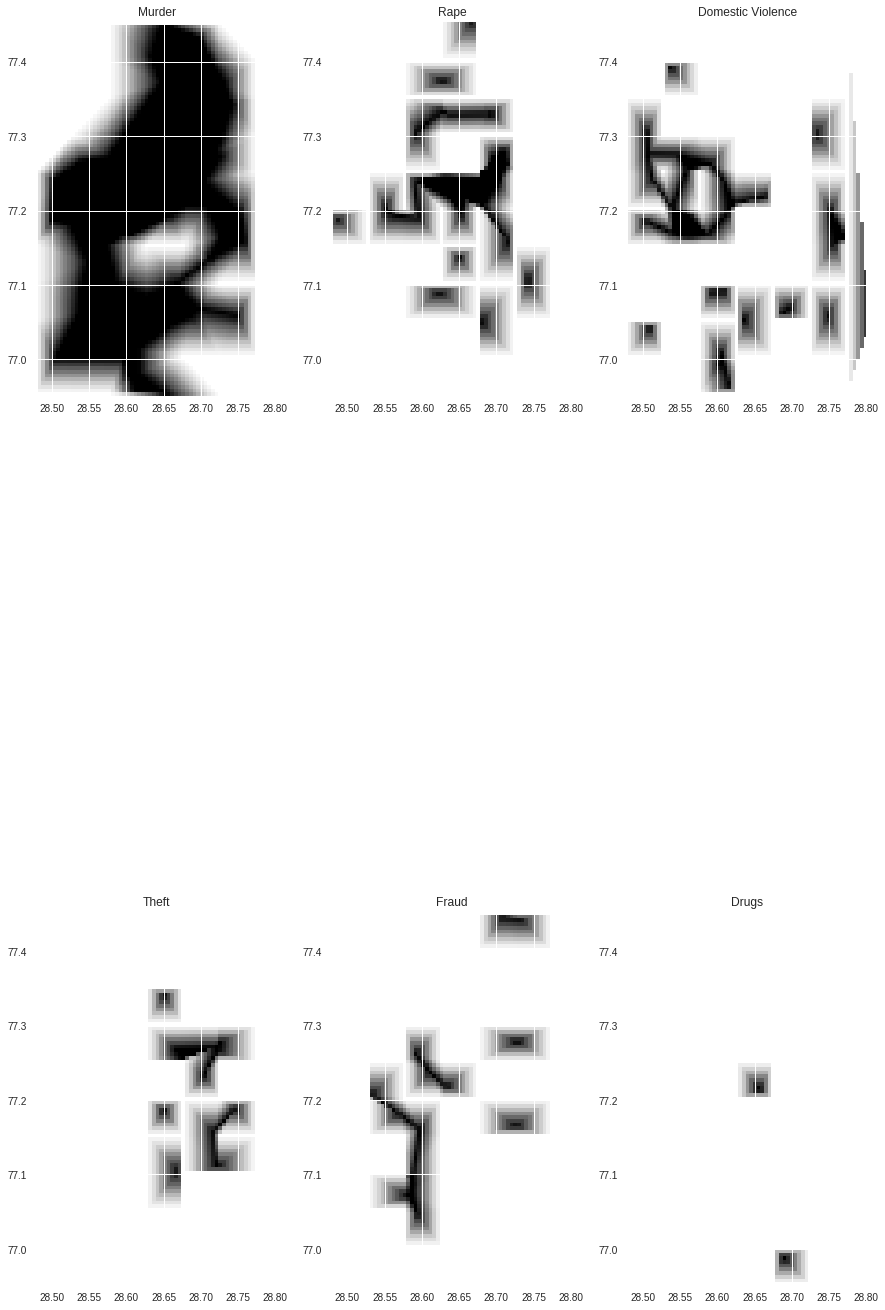

In [0]:
import matplotlib.pyplot as plt
# plt.subplot(221)
# plt.imshow(func(grid_x, grid_y).T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
# plt.plot(Location[:,0], Location[:,1], 'ro', ms=1)
# # plt.plot(lat, long, 'k.', ms=1)


plt.subplot(231)
plt.imshow(gridM.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Murder')


plt.subplot(232)
plt.imshow(gridR.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Rape')


plt.subplot(233)
plt.imshow(gridDV.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Domestic Violence')


plt.subplot(234)
plt.imshow(gridT.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Theft')


plt.subplot(235)
plt.imshow(gridF.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Fraud')


plt.subplot(236)
plt.imshow(gridD.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Drugs')


plt.gcf().set_size_inches(15,30)
plt.show()

In [0]:
def getIntensity(lat,lng):
	if lat < minLat or lat > maxLat or lng < minLong or lng > maxLong:
		return 0.0
	x = (lat - minLat)/(maxLat - minLat) * len(gridM)
	y = (lng - minLong)/(maxLong - minLong) * len(gridM)
	intensity = dict()
	average = 0
	count = 0
	flag = 1
	try:
		intensity['Murder'] = gridM[int(round(x))][int(round(y))] 
		if intensity['Murder'] != 0:
			average += intensity['Murder']
			count += 1
			flag = 0
		intensity['Rape'] = gridR[int(round(x))][int(round(y))]
		if intensity['Rape'] != 0:
			average += intensity['Rape']
			count += 1
			flag = 0
		intensity['DomesticViolence'] = gridDV[int(round(x))][int(round(y))]
		if intensity['DomesticViolence'] != 0:
			average += intensity['DomesticViolence']
			count += 1
			flag = 0
		intensity['Theft'] = gridT[int(round(x))][int(round(y))]
		if intensity['Theft'] != 0:
			average += intensity['Theft']
			count += 1
			flag = 0
		intensity['Fraud'] = gridF[int(round(x))][int(round(y))]
		if intensity['Fraud'] != 0:
			average += intensity['Fraud']
			count += 1
		intensity['Drugs'] = gridD[int(round(x))][int(round(y))]
		if intensity['Drugs'] != 0:
			average += intensity['Drugs']
			count += 1
			flag = 0
	except:
		return 0.0
	TOC = max(intensity.items(), key=operator.itemgetter(1))[0]
	if flag == 1:
		average = 0
	else:
		average /= count
	# severity = intensity[TOC]
	intensity = average
	return intensity



In [0]:
getIntensity(28.6122868,77.325467)

60.84828183225275

In [0]:
# import matplotlib.pyplot as plt
# plt.plot(lat,long, 'ro')
# plt.axis([minLat,maxLat,minLong,maxLong])
# plt.show()

In [0]:
# np.save('murderModel',gridM)
# np.save('rapeModel',gridR)
# np.save('domesticModel',gridDV)
# np.save('theftModel',gridT)
# np.save('fraudModel',gridF)
# np.save('drugModel',gridD)

In [0]:
# files.download('murderModel.npy')
# files.download('rapeModel.npy')
# files.download('domesticModel.npy')
# files.download('theftModel.npy')
# files.download('fraudModel.npy')
# files.download('drugModel.npy')

In [0]:
# gridM = np.load('murderModel' + '.npy')
# gridR = np.load('rapeModel' + '.npy')
# gridDV = np.load('domesticModel' + '.npy')
# gridT = np.load('theftModel' + '.npy')
# gridF = np.load('fraudModel' + '.npy')
# gridD = np.load('drugModel' + '.npy')


In [0]:
import json
import pandas

In [0]:
def findLatLong(i,j):
  lat = (i/len(gridM) * (maxLat-minLat)) + minLat
  lng = (j/len(gridM) * (maxLong-minLong)) + minLong
  return lat,lng

In [0]:
dataM = []
for i in range(0,len(gridM)):
  for j in range(0,len(gridM)):
    lat,lng = findLatLong(i,j)
    weight = gridM[i][j]/50
    if weight > 0.01:
      obj = {}
      obj['lat'] = lat
      obj['lng'] = lng
      obj['weight'] = weight
      dataM += [obj]
    
dataR = []
for i in range(0,len(gridM)):
  for j in range(0,len(gridM)):
    lat,lng = findLatLong(i,j)
    weight = gridR[i][j]/50
    if weight > 0.01:
      obj = {}
      obj['lat'] = lat
      obj['lng'] = lng
      obj['weight'] = weight
      dataR += [obj]

dataDV = []
for i in range(0,len(gridM)):
  for j in range(0,len(gridM)):
    lat,lng = findLatLong(i,j)
    weight = gridDV[i][j]/50
    if weight > 0.01:
      obj = {}
      obj['lat'] = lat
      obj['lng'] = lng
      obj['weight'] = weight
      dataDV += [obj]
    
dataT = []
for i in range(0,len(gridM)):
  for j in range(0,len(gridM)):
    lat,lng = findLatLong(i,j)
    weight = gridT[i][j]/50
    if weight > 0.01:
      obj = {}
      obj['lat'] = lat
      obj['lng'] = lng
      obj['weight'] = weight
      dataT += [obj]
      
      
dataF = []
for i in range(0,len(gridM)):
  for j in range(0,len(gridM)):
    lat,lng = findLatLong(i,j)
    weight = gridF[i][j]/50
    if weight > 0.01:
      obj = {}
      obj['lat'] = lat
      obj['lng'] = lng
      obj['weight'] = weight
      dataF += [obj]
    
dataD = []
for i in range(0,len(gridM)):
  for j in range(0,len(gridM)):
    lat,lng = findLatLong(i,j)
    weight = gridD[i][j]/50
    if weight > 0.01:
      obj = {}
      obj['lat'] = lat
      obj['lng'] = lng
      obj['weight'] = weight
      dataD += [obj]
    

In [0]:
with open('crimeCentreM.json', 'w') as outfile:
    json.dump(dataM,outfile)
    
files.download('crimeCentreM.json')

with open('crimeCentreR.json', 'w') as outfile:
    json.dump(dataR,outfile)
    
files.download('crimeCentreR.json')

with open('crimeCentreDV.json', 'w') as outfile:
    json.dump(dataDV,outfile)
    
files.download('crimeCentreDV.json')

with open('crimeCentreT.json', 'w') as outfile:
    json.dump(dataT,outfile)
    
files.download('crimeCentreT.json')

with open('crimeCentreF.json', 'w') as outfile:
    json.dump(dataF,outfile)
    
files.download('crimeCentreF.json')

with open('crimeCentreD.json', 'w') as outfile:
    json.dump(dataD,outfile)
    
files.download('crimeCentreD.json')


In [0]:
#Model Constants

intercept = 0.928568881
timeSlope = 0.247609499
trafficSlope =	-0.004666748
policeSlope =	0.102761641
populationSlope =	0.207043419
intensitySlope	 = 0.009338735

#Everything in a single function
def multipleLinearRegression(lat,long):
  latLong = []
  for i,row in masterTable.iterrows():
    latLong += [(row[5],row[6])]
  tree = spatial.KDTree(latLong)
  dist = tree.query([(lat,long)])[0][0]
  index = tree.query([(lat,long)])[1][0]
  PoliceStations = masterTable['PoliceStations'][index]
  Population = masterTable['c-population'][index]
  Traffic = masterTable['c-traffic'][index]
  Time = masterTable['C-time'][index]
  Intensity = getIntensity(lat,long)
  Severity = (timeSlope * Time) + (trafficSlope * Traffic) + (policeSlope * PoliceStations) +  (populationSlope * Population) + (intensitySlope * Intensity) + intercept
  return [PoliceStations,Time,Population,Traffic,Intensity,Severity]

In [0]:
inputFile1 = pd.read_csv('generatedMockData.csv')
inputFile2 = pd.read_csv('pre-processed-mastertable2.csv')
writeFile = open('extraData.csv','w')
writer = csv.writer(writeFile)

In [0]:
inputFile2.columns

Index(['Area', 'PoliceStations', 'C-time', 'c-population', 'c-traffic', 'lat',
       'long', 'Intensity', 'Severity'],
      dtype='object')

In [0]:
for i in inputFile2.iterrows():
  print(i[1][0],i[1][1],i[1][2],i[1][3],i[1][4],i[1][5],i[1][6],i[1][7],i[1][8])
  row = [i[1][0],i[1][1],i[1][2],i[1][3],i[1][4],i[1][5],i[1][6],i[1][7],i[1][8]]
  writer.writerow(row)

for j in inputFile1.iterrows():
  mockValues = multipleLinearRegression(j[1][1],j[1][2])
  print([j[1][0]] + mockValues[:4] + [j[1][1]] + [j[1][2]] + mockValues[-2:])
  row = [j[1][0]] + mockValues[:4] + [j[1][1]] + [j[1][2]] + mockValues[-2:]
  writer.writerow(row)
  
writeFile.close()
files.download('extraData.csv')

Aman Vihar 6 2 3 2 28.560323 77.16172809999998 36.58563355341092 2.9938180225624134
Amar Colony 7 2 3 4 28.561731800000004 77.24267900000002 46.43970352099138 3.1792707156611053
Anand Vihar Metro Station 4 1 3 2 28.6469338 77.31607640000001 71.7044144959907 2.868650230308216
Ansari Nagar 6 4 4 1 28.5689135 77.1722409 14.634253421364365 3.495749065624965
Anwar Delhi Cafeteria 1 1 3 4 25.348499 55.39357270000001 0.0 1.8814032859999998
AQI INDIA 3 1 3 1 28.7198206 77.1094982 18.339672746887988 2.2721961557699095
Badarpur 2 1 3 3 28.503960600000006 77.3018279 79.1357183705761 2.727859177897442
Barakhamba 5 1 3 4 28.6336377 77.22612059999999 25.95775419171629 2.534862437591578
Bawana 2 3 3 3 28.805465100000006 77.0463008 0.0 2.484050673
Bhalswa 2 4 3 1 28.757322 77.1544 42.401916631829494 3.136973930916748
BJP - Delhi State Office 6 1 3 4 28.622008500000003 77.20678240000002 0.0 2.395211491
Burari 0 1 3 4 28.7535212 77.19482409999998 35.57333129539174 2.1108515590348698
Burari 0 1 3 2 28.75